In [ ]:
# 1. Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2. Load dataset
tips = sns.load_dataset("tips")

In [ ]:
# 3. Initial data inspection
display(tips.head())
display(tips.tail())

display(pd.DataFrame({"Rows": [tips.shape[0]],"Columns": [tips.shape[1]]}))

display(pd.DataFrame(tips.columns, columns=["Column Names"]))

display(pd.DataFrame({
    "Column": tips.columns,
    "Non-Null Count": tips.notnull().sum().values,
    "Dtype": tips.dtypes.values
}))

display(tips.describe())


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


,Rows,Columns
0,244,7


,Column Names
0,total_bill
1,tip
2,sex
3,smoker
4,day
5,time
6,size


,Column,Non-Null Count,Dtype
0,total_bill,244,float64
1,tip,244,float64
2,sex,244,category
3,smoker,244,category
4,day,244,category
5,time,244,category
6,size,244,int64


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# 4. Preserve raw copy of data
tips_raw = tips.copy()

In [ ]:
# 5. Missing values and duplicate check
display(tips.isnull().sum())
display(tips.duplicated().sum())
tips = tips.drop_duplicates() # Remove duplicate rows

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

np.int64(1)

In [ ]:
# 6. Data type correction
tips['size'] = tips['size'].astype(int)
tips[['total_bill','tip']] = tips[['total_bill','tip']].astype(float)
tips[['sex', 'smoker', 'day', 'time']] = tips[['sex', 'smoker', 'day', 'time']].astype('category')


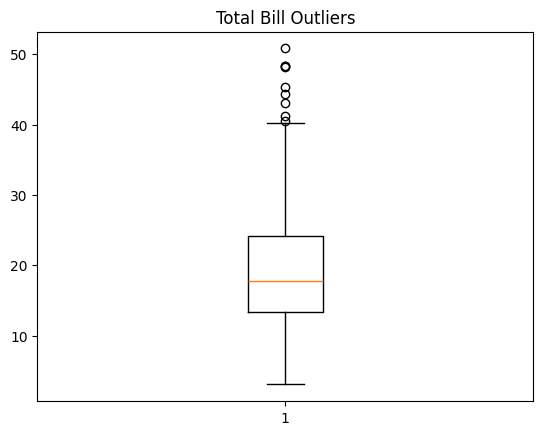

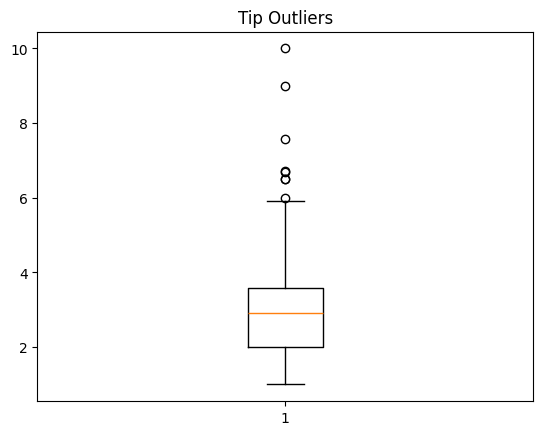

In [ ]:
# 7. Outlier detection using boxplots
plt.boxplot(tips['total_bill'])
plt.title("Total Bill Outliers")
plt.show()

plt.boxplot(tips['tip'])
plt.title("Tip Outliers")
plt.show()

In [ ]:
# 8. Outlier removal using IQR method
Q1 = tips[['total_bill', 'tip']].quantile(0.25)
Q3 = tips[['total_bill', 'tip']].quantile(0.75)
IQR = Q3 - Q1

mask = ~(
    (tips[['total_bill', 'tip']] < (Q1 - 1.5 * IQR)) |
    (tips[['total_bill', 'tip']] > (Q3 + 1.5 * IQR))
).any(axis=1)

tips = tips[mask]

In [ ]:
# 9. Post-cleaning validation
display(tips.shape)
display(tips.isnull().sum())

#END OF DATA-PREPROCESSING

(229, 7)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
# 10. Correlation analysis (numerical features only)
corr = tips.corr(numeric_only=True)
display(corr)

,total_bill,tip,size
total_bill,1.000000,0.605171,0.561721
tip,0.605171,1.000000,0.413063
size,0.561721,0.413063,1.000000


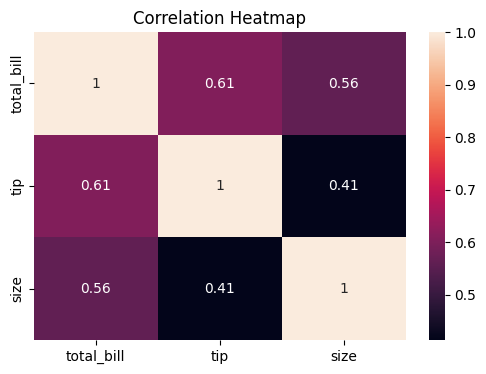

In [ ]:
# 11. Encoding categorical variables
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 11. Encoding categorical variables
# One-hot encoding converts categories into numerical form
tips_encoded = pd.get_dummies(tips, drop_first=True)
display(tips_encoded.head())

,total_bill,tip,size,tip_percentage,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,0.059447,True,True,False,False,True,True
1,10.34,1.66,3,0.160542,False,True,False,False,True,True
2,21.01,3.50,3,0.166587,False,True,False,False,True,True
3,23.68,3.31,2,0.139780,False,True,False,False,True,True
4,24.59,3.61,4,0.146808,True,True,False,False,True,True


,total_bill,tip,size,tip_percentage,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
total_bill,1.000000,0.605171,0.561721,-0.380274,-0.122046,-0.081856,-0.058118,0.021254,0.157800,0.203656
tip,0.605171,1.000000,0.413063,0.389442,-0.031658,-0.006707,-0.024241,-0.088025,0.196627,0.122796
size,0.561721,0.413063,1.000000,-0.167706,-0.047708,0.119576,-0.131983,-0.037752,0.218841,0.136849
tip_percentage,-0.380274,0.389442,-0.167706,1.000000,0.081100,-0.042339,0.042771,-0.110828,0.079771,-0.040584
sex_Female,-0.122046,-0.031658,-0.047708,0.081100,1.000000,0.033993,0.069605,-0.063802,-0.151896,-0.198458
smoker_No,-0.081856,-0.006707,0.119576,-0.042339,0.033993,1.000000,-0.260432,-0.168905,0.202341,-0.055502
day_Fri,-0.058118,-0.024241,-0.131983,0.042771,0.069605,-0.260432,1.000000,-0.222525,-0.201636,-0.059620
day_Sat,0.021254,-0.088025,-0.037752,-0.110828,-0.063802,-0.168905,-0.222525,1.000000,-0.495921,0.460744
day_Sun,0.157800,0.196627,0.218841,0.079771,-0.151896,0.202341,-0.201636,-0.495921,1.000000,0.417492
time_Dinner,0.203656,0.122796,0.136849,-0.040584,-0.198458,-0.055502,-0.059620,0.460744,0.417492,1.000000


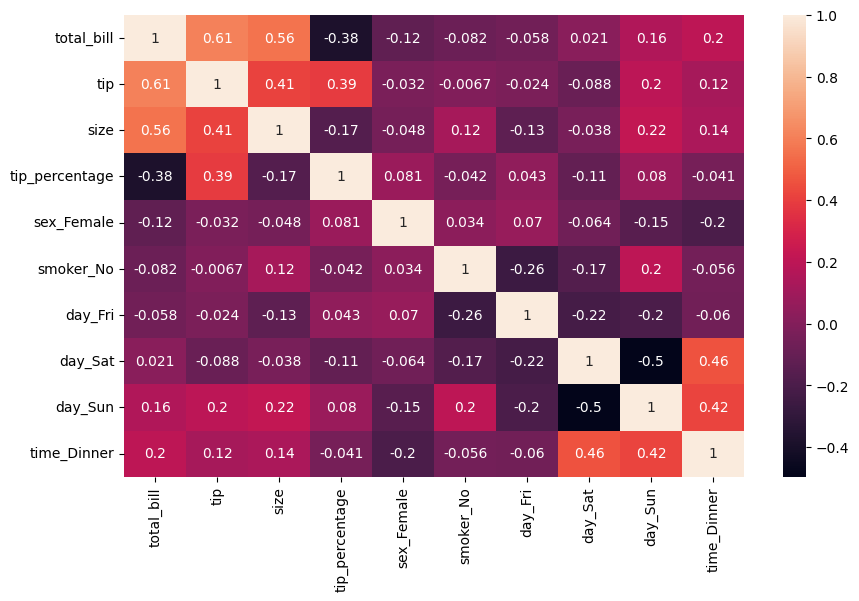

In [ ]:
# 12. Correlation on encoded dataset
corr_encoded = tips_encoded.corr()
display(corr_encoded)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_encoded,annot=True)
plt.show()

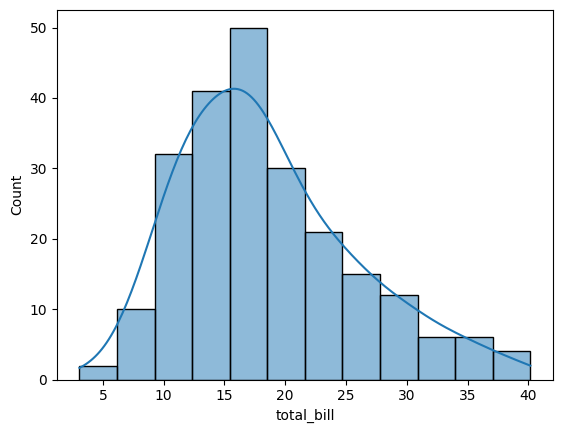

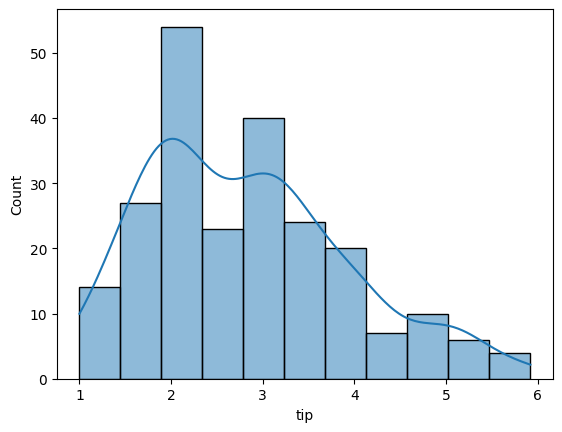

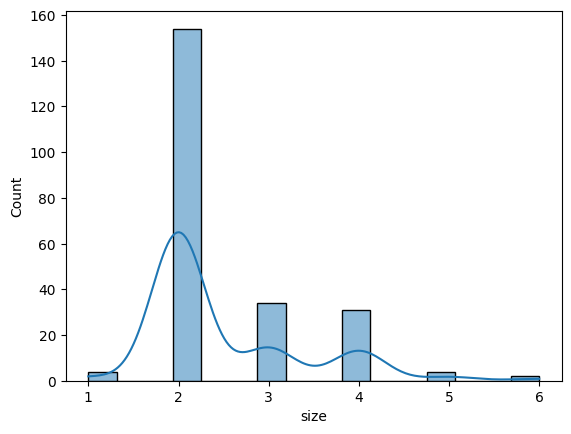

In [ ]:
# 13. Distribution analysis
# Histograms show data distribution and skewness
sns.histplot(tips['total_bill'], kde=True)
plt.show()

sns.histplot(tips['tip'], kde=True)
plt.show()

sns.histplot(tips['size'], kde=True)
plt.show()

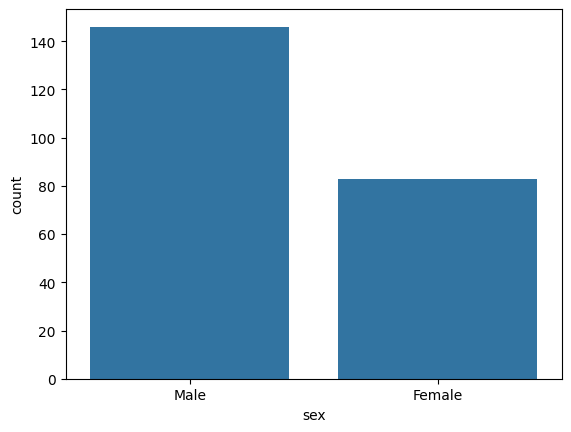

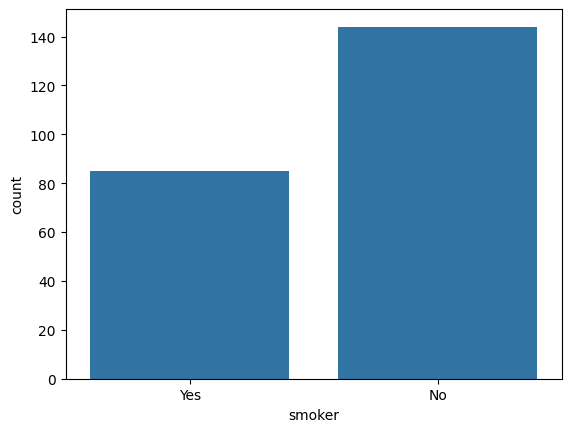

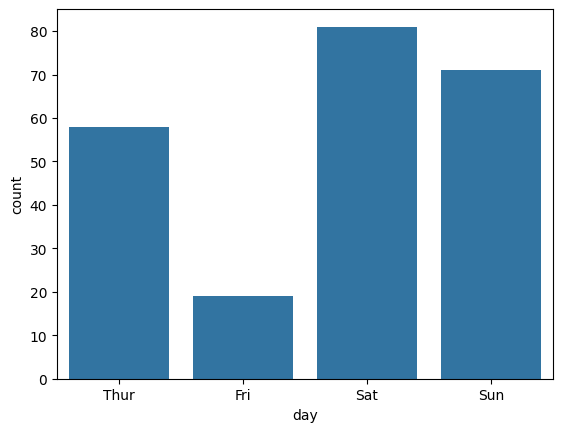

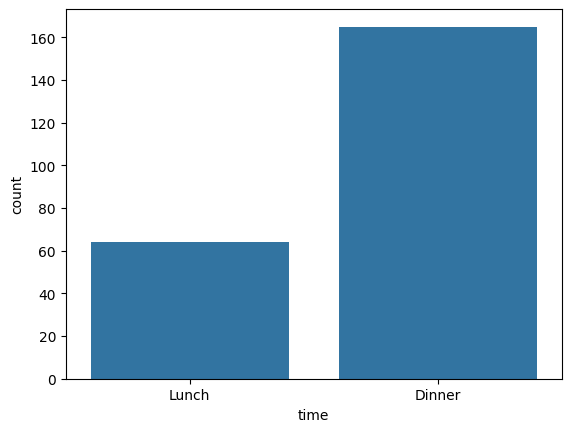

In [ ]:
# 14. Categorical feature counts
sns.countplot(x='sex', data=tips)
plt.show()

sns.countplot(x='smoker', data=tips)
plt.show()

sns.countplot(x='day', data=tips)
plt.show()

sns.countplot(x='time', data=tips)
plt.show()


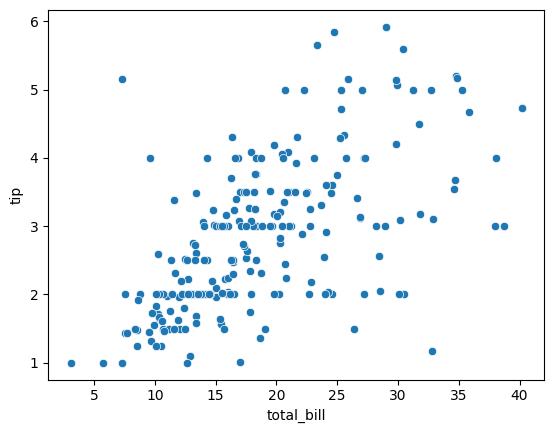

In [ ]:
# 15. Relationship analysis
# Scatter plot -> relationship between total bill and tip
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.show()

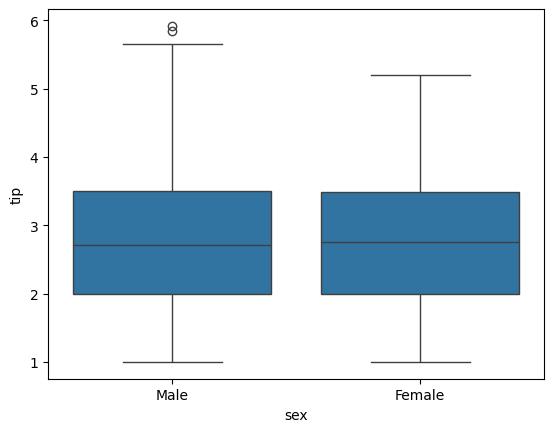

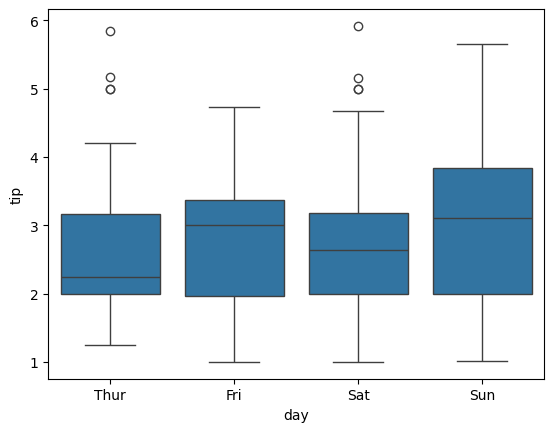

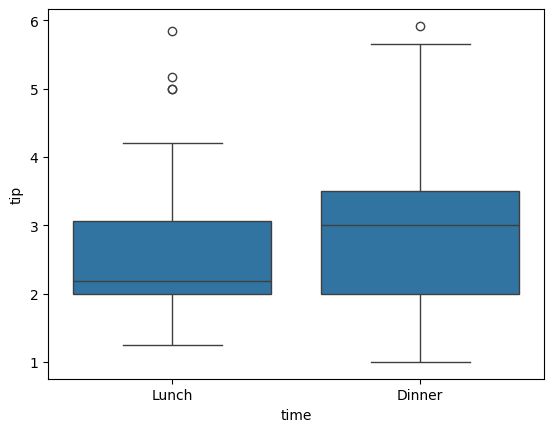

In [ ]:
# 16. Boxplots for categorical vs numerical comparison
sns.boxplot(x='sex', y='tip', data=tips)
plt.show()

sns.boxplot(x='day', y='tip', data=tips)
plt.show()

sns.boxplot(x='time', y='tip', data=tips)
plt.show()

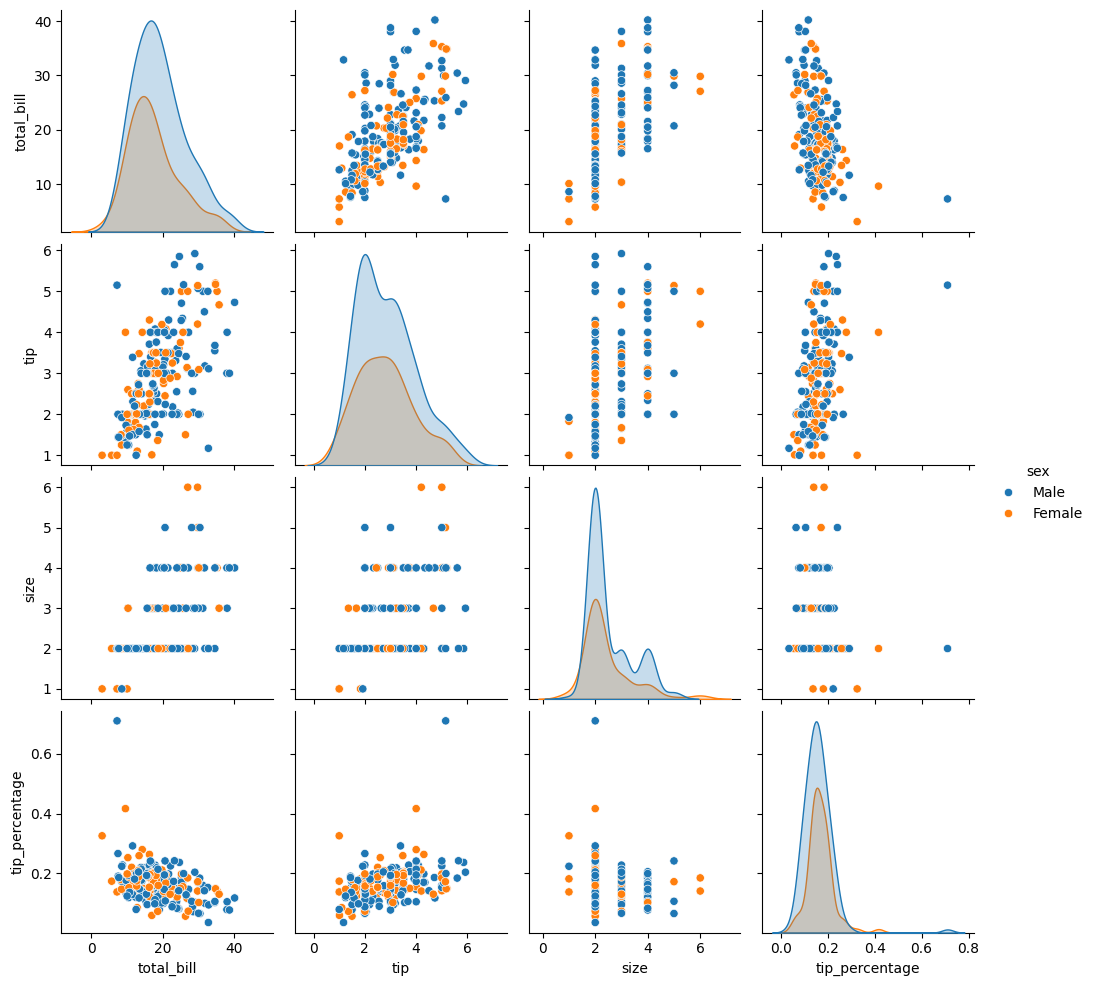

In [ ]:
# 17. Pairwise relationships
# Pairplot shows interactions between all numerical variables
sns.pairplot(tips, hue='sex')
plt.show()

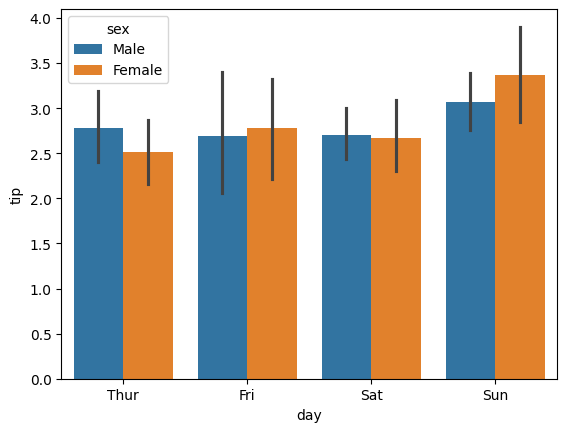

In [ ]:
# 18. Aggregated comparison
# Average tip by day and gender
sns.barplot(x='day', y='tip', hue='sex', data=tips)
plt.show()